<a href="https://colab.research.google.com/github/SayedShaun/Machine-Learning/blob/main/Non_Gaussian_Distribution_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
!kaggle datasets download -d jainaru/thyroid-disease-data
with zipfile.ZipFile("/content/thyroid-disease-data.zip", "r") as file:
  file.extractall()

Dataset URL: https://www.kaggle.com/datasets/jainaru/thyroid-disease-data
License(s): Attribution 4.0 International (CC BY 4.0)
thyroid-disease-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
df = pd.read_csv("/content/Thyroid_Diff.csv", usecols=["Age", "Recurred"])
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Age,Recurred
0,80,Yes
1,61,No
2,44,Yes
3,27,No
4,45,No


In [5]:
def distribution(x):
  sns.displot(x, kde=True)
  plt.title(f"Skewness: {stats.skew(x)}")
  plt.show()

In [35]:
def data_plot(x):
  fig, ax = plt.subplots(1, 3, figsize=(12, 5))
  sns.histplot(x=x, kde=True, ax=ax[0])
  ax[0].set_title(f"Histogram(Skew: {stats.skew(x):.3f})")
  stats.probplot(x, plot=ax[1])
  sns.boxplot(x=x, ax=ax[2])
  ax[2].set_title(f"Boxplot")
  plt.tight_layout()
  plt.show()

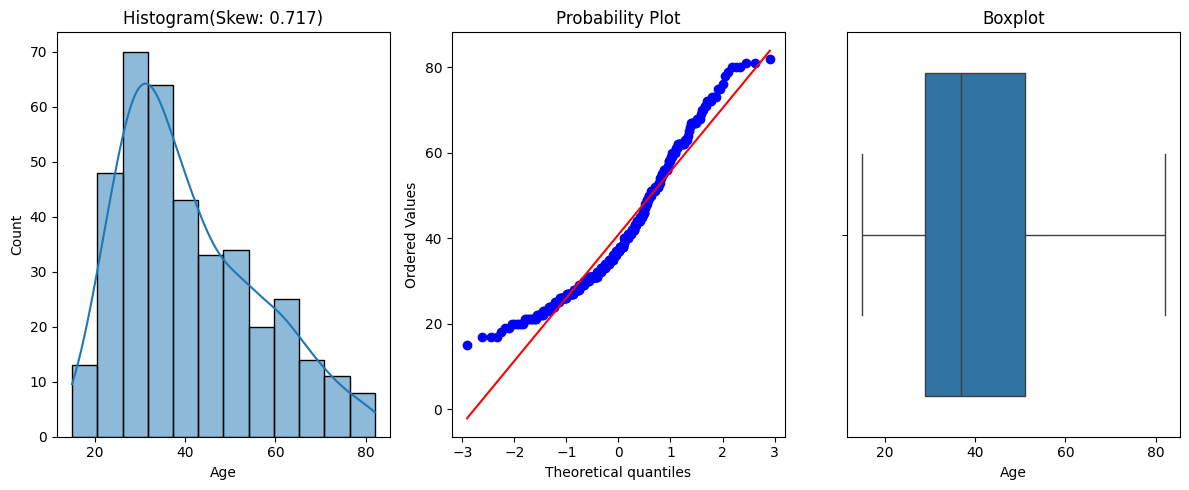

In [36]:
data_plot(df["Age"])

## Transform Age to Normal Distribution with Log

In [48]:
from sklearn.preprocessing import FunctionTransformer

def log_transform(col):
  transformer = FunctionTransformer(np.log1p)
  return transformer.fit_transform(col)

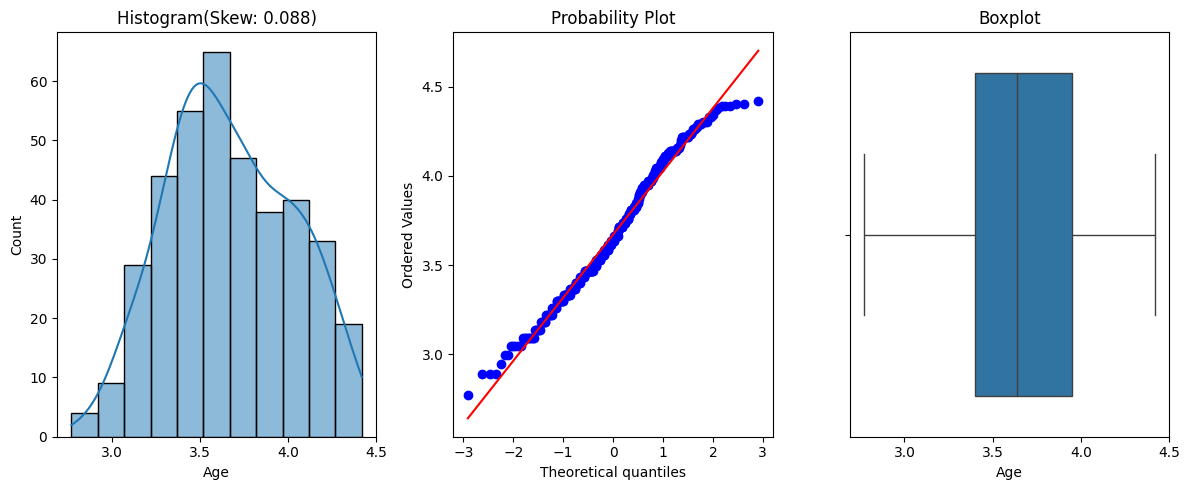

In [49]:
transformed_data = log_transform(df["Age"])
data_plot(transformed_data)

## Transform Non-Gaussian to Gaussian Distribution with Box-Cox

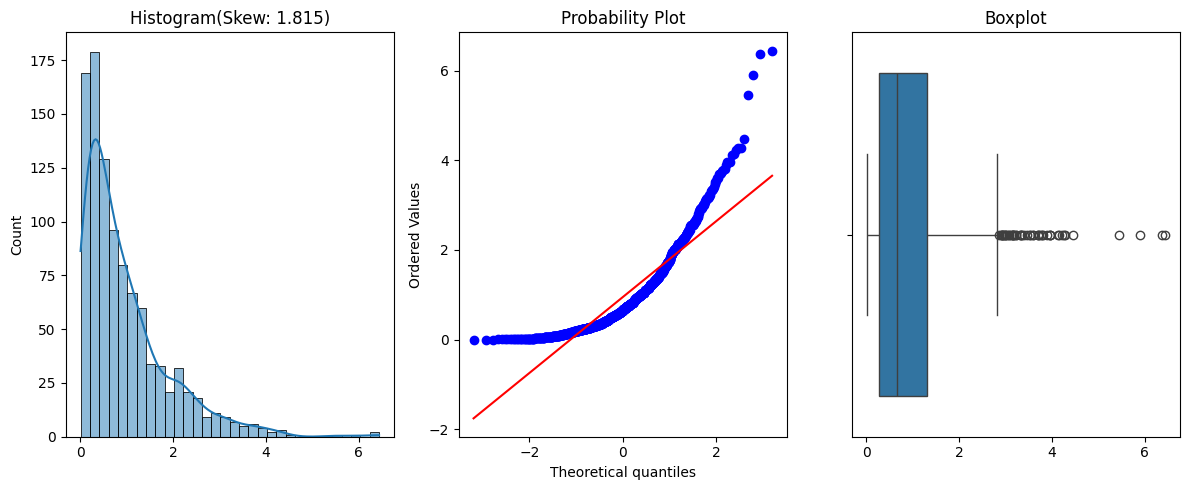

In [40]:
right_skewed = np.random.exponential(1, 1000)
data_plot(right_skewed)

In [41]:
from sklearn.preprocessing import PowerTransformer

def box_cox_transform(x):
  transformer = PowerTransformer(method="box-cox")
  return transformer.fit_transform(x.reshape(-1, 1))

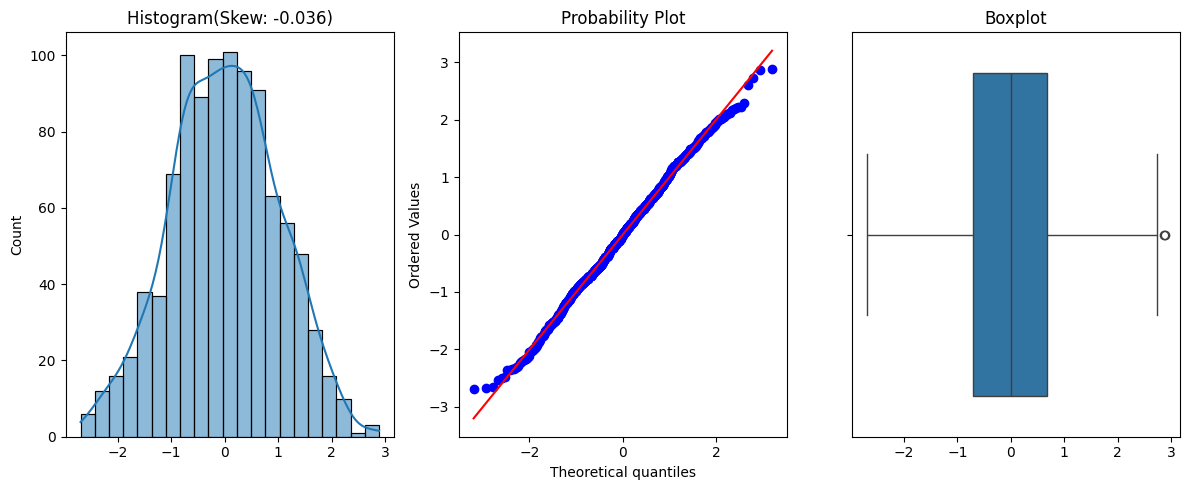

In [43]:
transformed_data = box_cox_transform(right_skewed)
data_plot(transformed_data.reshape(-1))

## Transform Non-Gaussian to Gaussian Distribution with Yeo-Johnson

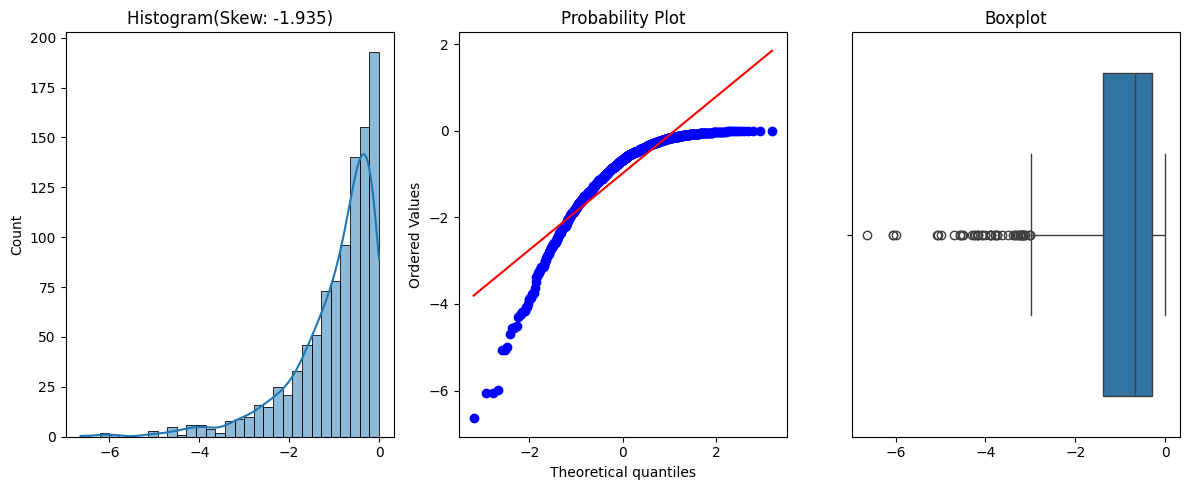

In [45]:
left_skewed = -np.random.exponential(1, 1000)
data_plot(left_skewed)

In [46]:
def yeo_johnson_transform(x):
  transformer = PowerTransformer(method='yeo-johnson')
  return transformer.fit_transform(x.reshape(-1, 1))

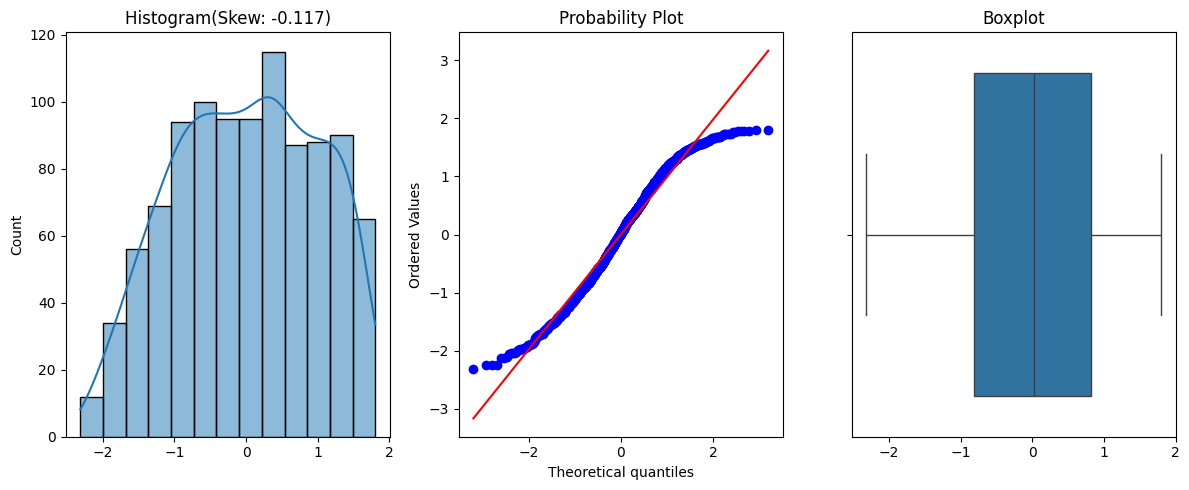

In [47]:
transformed_data = yeo_johnson_transform(left_skewed)
data_plot(transformed_data.reshape(-1))